In [35]:
#from settings import *

In [1]:
import pandas as pd
import numpy as np
import json
from tqdm.auto import tqdm
import networkx as nx

In [2]:
raw_metadata = pd.read_csv('/Users/datalab/bigdata/FalseNews_Code_Data/data/raw_data_anon.csv')

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
raw_metadata

,tid,veracity,cascade_id,rumor_id,rumor_category,parent_tid,tweet_date,user_account_age,user_verified,user_followers,user_followees,user_engagement,cascade_root_tid,was_retweeted
0,5970798468,FALSE,0,r_-1,Politics,-1,2015-05-09 16:45:03,2064,False,4353,963,2.461932,597079846846668800,0
1,0,FALSE,1,r_0,Politics,-1,2013-08-22 21:09:08,1326,False,164,236,7.092405,0,0
2,632718,FALSE,2,r_2,Politics,-1,2015-10-24 17:50:24,136,False,14149,13846,198.410726,632718,0
3,643829,FALSE,3,r_24,Politics,-1,2015-09-10 05:43:00,1054,False,1363,1325,3.864481,643829,0
4,654940,FALSE,4,r_1,Politics,-1,2013-04-22 18:46:37,1568,False,717,2071,1.428586,654940,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4034731,624527,False,126301,r_395,Politics,624284,2016-08-30 21:58:02,2084,False,2471,2824,30.943673,613268,0
4034732,624528,False,126301,r_395,Politics,624284,2016-08-31 04:09:52,1121,False,250,805,9.176002,613268,0
4034733,624373,False,126301,r_395,Politics,624086,2016-08-31 00:46:50,49,False,8,78,0.293459,613268,0
4034734,624529,False,126301,r_395,Politics,624284,2016-08-31 20:45:42,1368,False,414,139,3.169038,613268,0


In [5]:
len(raw_metadata['cascade_id'].unique())

126302

In [36]:
from collections import Counter
c = Counter(raw_metadata['cascade_id'])
c.most_common(20)

[(82588, 46895),
 (82587, 45451),
 (82586, 42149),
 (82585, 41196),
 (82584, 38240),
 (82583, 35016),
 (82582, 33750),
 (82581, 31515),
 (126286, 31401),
 (126285, 30967),
 (126288, 30517),
 (126287, 29229),
 (82579, 26624),
 (82580, 26525),
 (82578, 25550),
 (82577, 25033),
 (82576, 24424),
 (82575, 24111),
 (106998, 23228),
 (82574, 22330)]

In [37]:
c.most_common(2000)[1980:2000]

[(82838, 175),
 (82855, 175),
 (80924, 174),
 (80928, 174),
 (81103, 174),
 (81119, 174),
 (81220, 174),
 (82857, 174),
 (80835, 173),
 (80920, 173),
 (81002, 173),
 (81013, 173),
 (81108, 173),
 (81212, 173),
 (82797, 173),
 (80826, 172),
 (80827, 172),
 (80906, 172),
 (80907, 172),
 (80911, 172)]

In [23]:
cascade = raw_metadata.loc[raw_metadata['cascade_id']== 80911]
len(cascade)

172

In [24]:
ids2date = cascade[['tid','parent_tid','tweet_date','cascade_id']]

#parent_tid=int(cascade['parent_tid'][i])
    
ids2date['tweet_date'] = pd.to_datetime(ids2date['tweet_date'])
ids2date = ids2date.sort_values(by=['tweet_date'], ascending=True)

root = ids2date[ids2date['parent_tid']== -1]
notroot = ids2date[ids2date['parent_tid']!= -1]

/var/folders/8b/hhnbt0nd4zsg2qhxc28q23w80000gn/T/ipykernel_87749/2866387382.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ids2date['tweet_date'] = pd.to_datetime(ids2date['tweet_date'])


In [25]:
graph=nx.DiGraph()
graph.add_node(root['tid'].to_list()[0],date = root['tweet_date'].to_list()[0])
for j in notroot.index:
    graph.add_node(notroot['tid'][j],date = notroot['tweet_date'][j])
    graph.add_edge(notroot['parent_tid'][j],notroot['tid'][j])

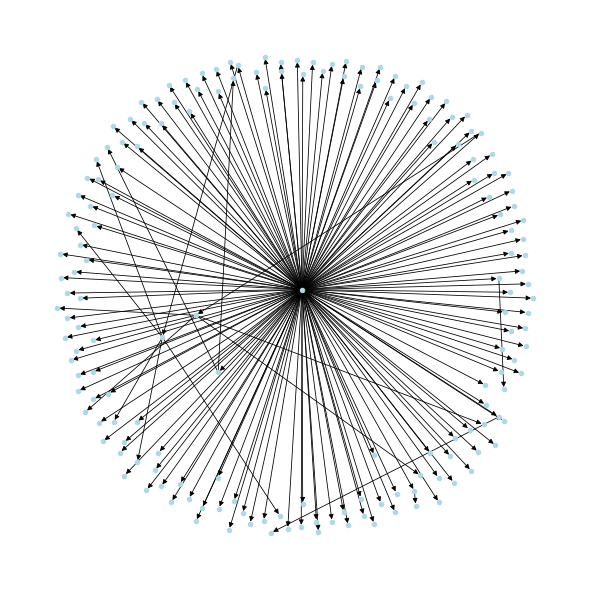

In [33]:
import pylab as plt

plt.figure(figsize=(8, 8))

pos = nx.spring_layout(graph, k=0.8)

nx.draw(graph, pos = pos, width=0.8, 
        node_color='lightblue', node_size=20)

In [6]:
cascade = raw_metadata.loc[raw_metadata['cascade_id']== 82588]
len(cascade)

46895

In [6]:
cascade_graph=graph.to_undirected()
node2date=nx.get_node_attributes(cascade_graph,'date')
root_date=node2date[list(root['tid'])[0]]
node_dates=node2date.items()
node_hours=[(n,(d-root_date).total_seconds()/3600) for n,d in node_dates]
node_hours.sort(key=lambda x: x[1])
ks = [5*i for i in range(1, 11)]
ts = list(range(1, 25))

In [8]:
nodelist_ks = [[i for i,j in node_hours[:k]] for k in ks ]

In [24]:
densities_ks = [] 
degrees_ks  = []
sum_subdegree_ks = []
connection_ks = []
sub_edges_ks = []
specific_ks = []
for k in range(len(nodelist_ks)):
    #density
    graph_ks = graph.subgraph(nodelist_ks[k])
    #calculate dynamic density        
    density_ks = nx.density(graph_ks)
    densities_ks.append(density_ks)

    #calculate dynamic degree(mean)
    degree_ks = [val for (node, val) in graph_ks.degree()]
    degree_ks = np.mean(degree_ks)
    degrees_ks.append(degree_ks)
    
    #reach
    deg = graph_ks.degree(nodelist_ks[k])
    sum_deg = sum(list(dict(deg).values()))
    sum_subdegree_ks.append(sum_deg)
    
    #connections: Number of edges from early adopters to the entire graph. (Romero, Tan, and Ugander 2013)
    edges = graph_ks.out_degree(nodelist_ks[k])
    edges_value = sum(list(dict(edges).values()))
    connection_ks.append(edges_value)
    
    #sub_edge
    sub_edge = graph_ks.number_of_edges()
    sub_edges_ks.append(sub_edge)
    
    #k_subdegree
    degree = graph_ks.degree(nodelist_ks[k])# subgraph
    specific_degree = list(dict(degree).values())[-1]
    specific_ks.append(specific_degree)

In [27]:
connection_ks

[4, 9, 14, 19, 24, 29, 34, 39, 44, 49]

In [16]:
nodelist_ts = [[i for i,j in node_hours if j <=t] for t in ts ]

In [28]:
densities_ts = [] 
degrees_ts  = []
sum_subdegree_ts = []
connection_ts = []
sub_edges_ts = []
specific_ts = []
for t in range(len(nodelist_ts)):
    #density
    graph_ts = graph.subgraph(nodelist_ts[t])

    #calculate dynamic density        
    density_ts = nx.density(graph_ts)
    densities_ts.append(density_ts)

    #calculate dynamic degree(mean)
    degree_ts = [val for (node, val) in graph_ts.degree()]
    degree_ts = np.mean(degree_ts)
    degrees_ts.append(degree_ts)
    
    #reach
    deg = graph_ts.degree(nodelist_ts[t])
    sum_deg = sum(list(dict(deg).values()))
    sum_subdegree_ts.append(sum_deg)
    
    #connections
    edges = graph_ts.out_degree(nodelist_ts[t])
    edges_value = sum(list(dict(edges).values()))
    connection_ts.append(edges_value)
    
    #sub_edge
    sub_edge = graph_ts.number_of_edges()
    sub_edges_ts.append(sub_edge)
    
    #t_subdegree
    degree = graph_ts.degree(nodelist_ts[t])# subgraph
    specific_degree = list(dict(degree).values())[-1]
    specific_ts.append(specific_degree)

In [32]:
specific_ts

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]